In [1]:
import impact
# from impact.module import Dummy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [2]:
KI_edges = pd.read_excel('../data/raw/KI_edges.xlsx')

In [3]:
print(len(KI_edges[KI_edges['fr_pilot'] == 'NER'][KI_edges['to_pilot'] != 'NER']))
print(len(KI_edges[KI_edges['fr_pilot'] != 'NER'][KI_edges['to_pilot'] == 'NER']))

0
0


/var/folders/57/93d17htn4fvf59qnk7npkv8m0000gn/T/ipykernel_2025/1231517046.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(KI_edges[KI_edges['fr_pilot'] == 'NER'][KI_edges['to_pilot'] != 'NER']))
/var/folders/57/93d17htn4fvf59qnk7npkv8m0000gn/T/ipykernel_2025/1231517046.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(KI_edges[KI_edges['fr_pilot'] != 'NER'][KI_edges['to_pilot'] == 'NER']))


all KIs from NER connect with each other, but not with other KIs from other countries.

In [4]:
KI_edges_NER = KI_edges[KI_edges['fr_pilot'] == 'NER']
print('record number = ', len(KI_edges_NER))
KI_edges_NER.head()

record number =  5149


to    from  intensity        relia           frequ  \
0  ic1005   ic743          5       fiable  tous_les_jours   
1  ic1006   ic995          6  tres_fiable  tous_les_jours   
2  ic1007  ic1653          5       fiable  tous_les_jours   
3  ic1007   ic369          6  tres_fiable  tous_les_jours   
4  ic1007   ic980          5       fiable  tous_les_jours   

                    ties  food  shelter  demographic  displacement  wash  \
0        famille travail   1.0      0.0          1.0           0.0   1.0   
1        famille travail   1.0      1.0          1.0           0.0   1.0   
2  famille travail autre   1.0      0.0          1.0           0.0   0.0   
3                famille   1.0      1.0          1.0           1.0   1.0   
4                travail   1.0      0.0          1.0           0.0   0.0   

   education  sante  health  livelihood fr_pilot          fr_quartier  \
0        0.0    1.0     NaN         NaN      NER  diffa_koura____food   
1        1.0    1.0     NaN         NaN      NER   garin_dogo____food   
2        1.0    1.0     NaN         NaN      NER       charre____food   
3        1.0    0.0     NaN         NaN      NER       charre____food   
4        0.0    0.0     NaN         NaN      NER       charre____food   

  to_pilot          to_quartier  
0      NER  diffa_koura____food  
1      NER   garin_dogo____food  
2      NER       charre____food  
3      NER       charre____food  
4      NER       charre____food

In [5]:
# number of nulls in each column
for col in KI_edges_NER.columns:
    print(sum(KI_edges_NER[col].isnull()),col, "null number")

0 to null number
0 from null number
0 intensity null number
0 relia null number
0 frequ null number
0 ties null number
0 food null number
0 shelter null number
0 demographic null number
0 displacement null number
0 wash null number
0 education null number
0 sante null number
5149 health null number
5149 livelihood null number
0 fr_pilot null number
0 fr_quartier null number
0 to_pilot null number
0 to_quartier null number


In [6]:
edges_NER_new = KI_edges_NER.drop(columns = ['health', 'livelihood', 'fr_pilot', 'to_pilot'])

## Findings
1. The number of null values in food, shelter, ..., seems to have a pattern.

2. in the 'relia' column, there are many values that we can merge. 

{
fiable: reliable, 

neutre: neutral, 

pas_trop_fiable: not too reliable, 

reliable, relilable: reliable, 

somehow_reliable = somewhat_reliable, 

tres_fiable = very reliable, 

unreliable
}

3. Use numbers to represent frequency(consider how to assign numbers). Also, there are some similar values that can be merged. 

{
1_2_quar: every 1-2 quarters a time    or    1-2 times a quarter?

at_least_every_other_month: every 2 months? every 1 month?

at_least_once_a_month_1_3_times_a_month: once a month? 1-3 times a month?

at_least_quarterly_1_2_times_every_three_months

au_moiins_1_fois_par_semaine: at least 1 time per week = at_least_once_a_week

au_moins_1_fois_toutes_les_2_semaines: at_least_1_ times_every_2_weeks

daily_or_almost_daily_4_7_times_a_week?

tous_les_jours: every day
}

4. We can use numbers to describe relia, frequ, ties.

5. About ties:

I think whenever there is a space, it means two different ties.

{
autre: other, 

famille autre: family other, 

famille travail: family job?? means family & job ties?

familie travail autre: family job other? Why is there an other here?

family_ties = family?

family_ties other = famille autre,

friendship_ties friendship_ties = friendship_ties,

friendship_ties professional_ties friendship_ties professional_ties = friendship_ties professional_ties,

professional_ties professional_ties = professional_ties,

tied_through_shura: What does this mean???

travail: job

travail autre: job other
}

## Questions
1. What is the NAN value in food(8283), shelter(3096), demographic(3096), displacement(3096), wash(3096), education(3096), sante(8283), health(8245), livelihood(8245). 

2. For the attribute 'frequ', some of the descriptions are a little bit confusing, and there are also some overlaps.(refer to the details above in findings)

3. For the attribute 'ties', some confusing values(refer to findings above). What's the difference between 'travail' and 'professional ties'?

In [7]:
edges_NER_new.head()

to    from  intensity        relia           frequ  \
0  ic1005   ic743          5       fiable  tous_les_jours   
1  ic1006   ic995          6  tres_fiable  tous_les_jours   
2  ic1007  ic1653          5       fiable  tous_les_jours   
3  ic1007   ic369          6  tres_fiable  tous_les_jours   
4  ic1007   ic980          5       fiable  tous_les_jours   

                    ties  food  shelter  demographic  displacement  wash  \
0        famille travail   1.0      0.0          1.0           0.0   1.0   
1        famille travail   1.0      1.0          1.0           0.0   1.0   
2  famille travail autre   1.0      0.0          1.0           0.0   0.0   
3                famille   1.0      1.0          1.0           1.0   1.0   
4                travail   1.0      0.0          1.0           0.0   0.0   

   education  sante          fr_quartier          to_quartier  
0        0.0    1.0  diffa_koura____food  diffa_koura____food  
1        1.0    1.0   garin_dogo____food   garin_dogo____food  
2        1.0    1.0       charre____food       charre____food  
3        1.0    0.0       charre____food       charre____food  
4        0.0    0.0       charre____food       charre____food

In [8]:
group_to = edges_NER_new.groupby('to')
group_from = edges_NER_new.groupby('from')

In [9]:
#in-degree for each KI(number of KIs ask this KI for advice)
in_degree = group_to[['from']].count()
in_degree = in_degree.rename(columns = {'from':'in_degree'})
# out-degree for each KI (number of KIs that this KI ask for advice)
out_degree = group_from[['to']].count()
out_degree = out_degree.rename(columns = {'to':'out_degree'})

In [10]:
# in-degree for each KI in each field(number of KIs ask this KI for advice in this field)
list_field = edges_NER_new.iloc[:,6:13].columns.tolist()
list_field_in = []
for i in range(len(list_field)):
    list_field_in.append(list_field[i]+'_in')
field_in_degree = group_to[list_field].sum()
field_in_degree.columns = list_field_in
# out-degree for each KI in each field(number of KIs this KI ask for advice in this field)
list_field_out = []
for i in range(len(list_field)):
    list_field_out.append(list_field[i]+'_out')
field_out_degree = group_from[list_field].sum()
field_out_degree.columns = list_field_out

In [11]:
df_KI = pd.concat([in_degree,out_degree, field_in_degree, field_out_degree], join = 'outer', axis = 1)
df_KI = df_KI.reset_index()
df_KI = df_KI.rename(columns = {'index':'code'})
df_KI = df_KI.fillna(0)
df_KI

code  in_degree  out_degree  food_in  shelter_in  demographic_in  \
0       ic10        9.0         0.0      0.0         3.0             9.0   
1     ic1005        5.0         0.0      5.0         0.0             5.0   
2     ic1006        7.0         5.0      7.0         7.0             7.0   
3     ic1007       15.0         7.0     15.0         7.0            15.0   
4     ic1008       26.0        18.0     22.0         5.0            26.0   
...      ...        ...         ...      ...         ...             ...   
1016   ic981        0.0        10.0      0.0         0.0             0.0   
1017   ic984        0.0         6.0      0.0         0.0             0.0   
1018   ic992        0.0         5.0      0.0         0.0             0.0   
1019   ic996        0.0         4.0      0.0         0.0             0.0   
1020   ic998        0.0         8.0      0.0         0.0             0.0   

      displacement_in  wash_in  education_in  sante_in  food_out  shelter_out  \
0                 0.0      0.0           0.0       0.0       0.0          0.0   
1                 0.0      5.0           0.0       5.0       0.0          0.0   
2                 0.0      7.0           7.0       7.0       5.0          5.0   
3                 7.0      7.0          12.0       5.0       0.0          7.0   
4                 0.0     22.0           0.0       5.0      18.0         10.0   
...               ...      ...           ...       ...       ...          ...   
1016              0.0      0.0           0.0       0.0      10.0         10.0   
1017              0.0      0.0           0.0       0.0       6.0          0.0   
1018              0.0      0.0           0.0       0.0       5.0          5.0   
1019              0.0      0.0           0.0       0.0       4.0          0.0   
1020              0.0      0.0           0.0       0.0       8.0          0.0   

      demographic_out  displacement_out  wash_out  education_out  sante_out  
0                 0.0               0.0       0.0            0.0        0.0  
1                 0.0               0.0       0.0            0.0        0.0  
2                 5.0               0.0       5.0            0.0        0.0  
3                 7.0               0.0       4.0            0.0        0.0  
4                18.0               0.0      14.0            0.0        6.0  
...               ...               ...       ...            ...        ...  
1016             10.0               0.0      10.0            0.0        0.0  
1017              6.0               0.0       0.0            0.0        0.0  
1018              5.0               0.0       5.0            0.0        0.0  
1019              4.0               0.0       4.0            0.0        0.0  
1020              8.0               0.0       8.0            0.0        0.0  

[1021 rows x 17 columns]

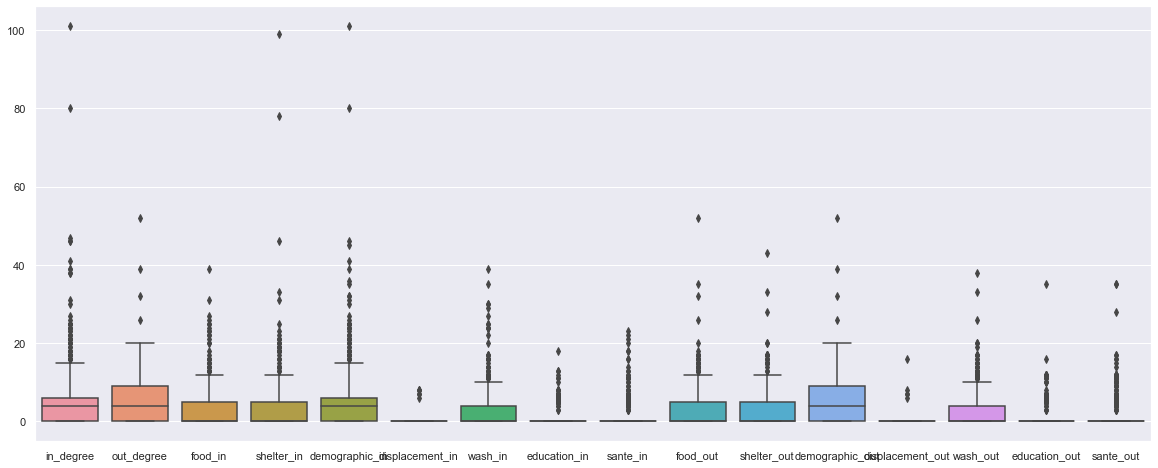

In [17]:
# plot_order = df_.groupby('type')['value_abs'].mean().sort_values(ascending=False).index.values
sns.set(rc = {'figure.figsize':(20,8)})
ax = sns.boxplot(data = df_KI)

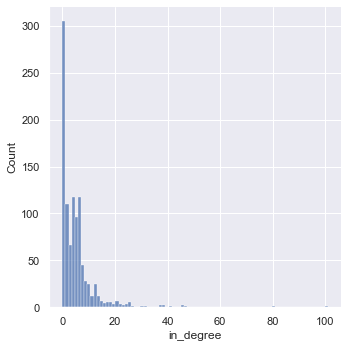

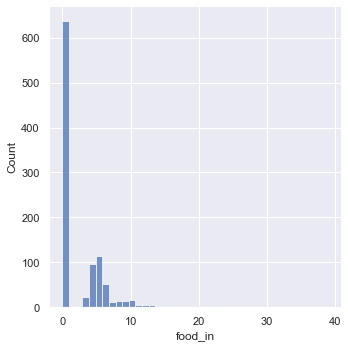

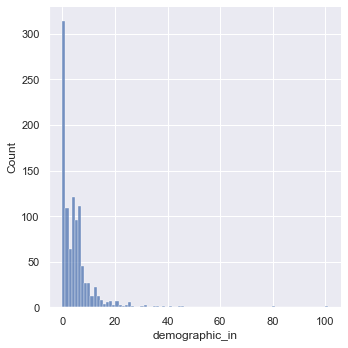

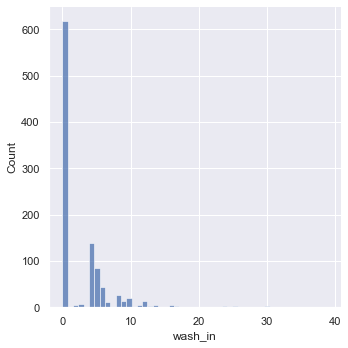

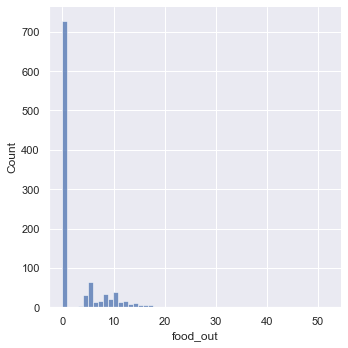

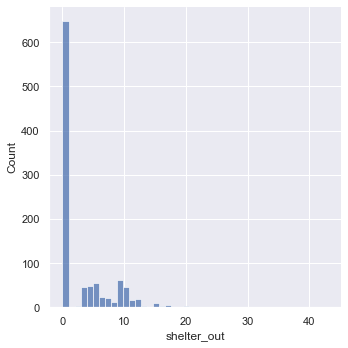

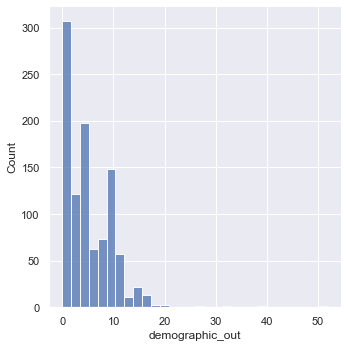

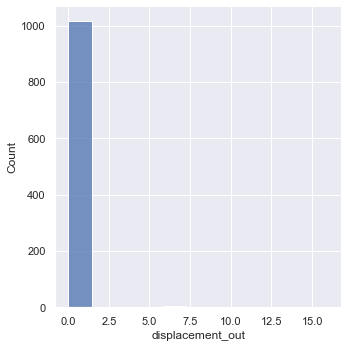

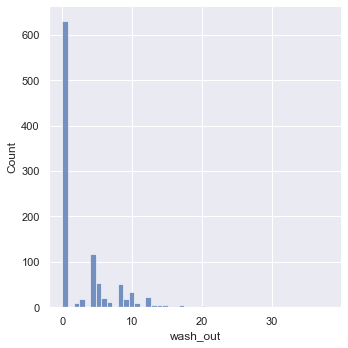

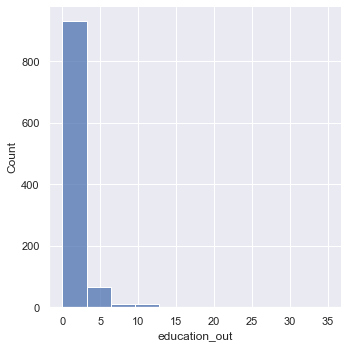

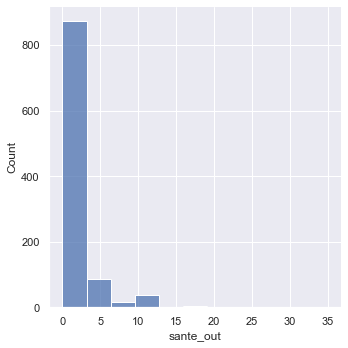

In [20]:
for col in df_KI.iloc[:, 1:].columns:
    sns.displot(df_KI, x = col)